In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from flask import Flask, render_template, request, redirect, url_for
import datetime
import ast


In [ ]:
df = pd.read_csv('financial_risk_assessment.csv')
df.head(5)

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [ ]:
df.describe()

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000,15000.000000,12750.000000,12750.00000,12750.000000,15000.000000
mean,43.452667,69933.398510,699.109098,27450.010902,9.476267,0.350438,159741.497176,2.02651,1.992471,0.998467
std,14.910732,29163.626207,57.229465,12949.940135,5.769707,0.143919,80298.115832,1.41130,1.416909,0.813782
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.00000,0.000000,0.000000
25%,31.000000,44281.500000,650.000000,16352.500000,4.000000,0.227386,90635.250000,1.00000,1.000000,0.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.00000,2.000000,1.000000
75%,56.000000,95922.750000,748.000000,38547.500000,15.000000,0.476095,228707.000000,3.00000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.00000,4.000000,2.000000


<Axes: >

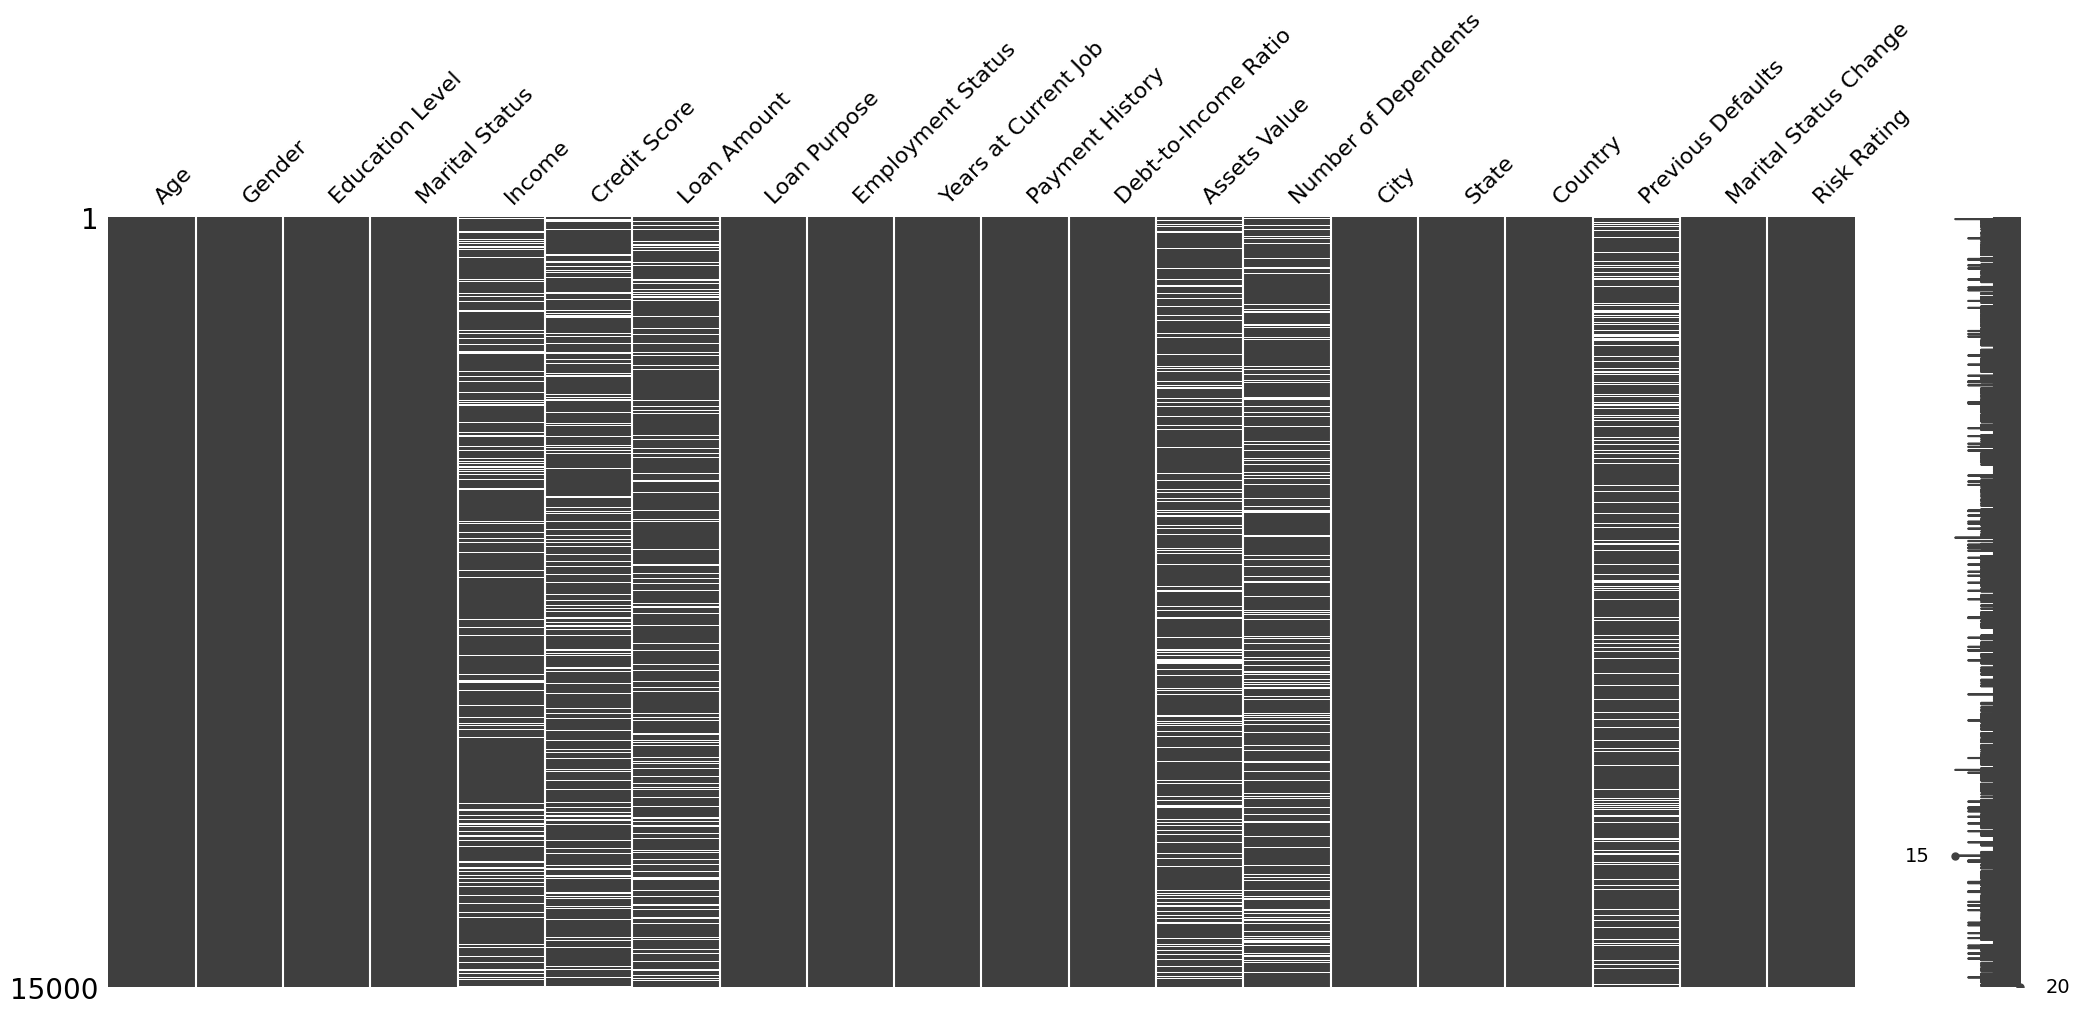

In [ ]:
msno.matrix(df)

In [ ]:
# filling missing data using median of that feature column
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)
df['Loan Amount'].fillna(df['Loan Amount'].median(), inplace=True)
df['Assets Value'].fillna(df['Assets Value'].median(), inplace=True)
df['Number of Dependents'].fillna(df['Number of Dependents'].median(), inplace=True)
df['Previous Defaults'].fillna(df['Previous Defaults'].median(), inplace=True)

<ipython-input-8-8365da74f127>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)
<ipython-input-8-8365da74f127>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

<Axes: >

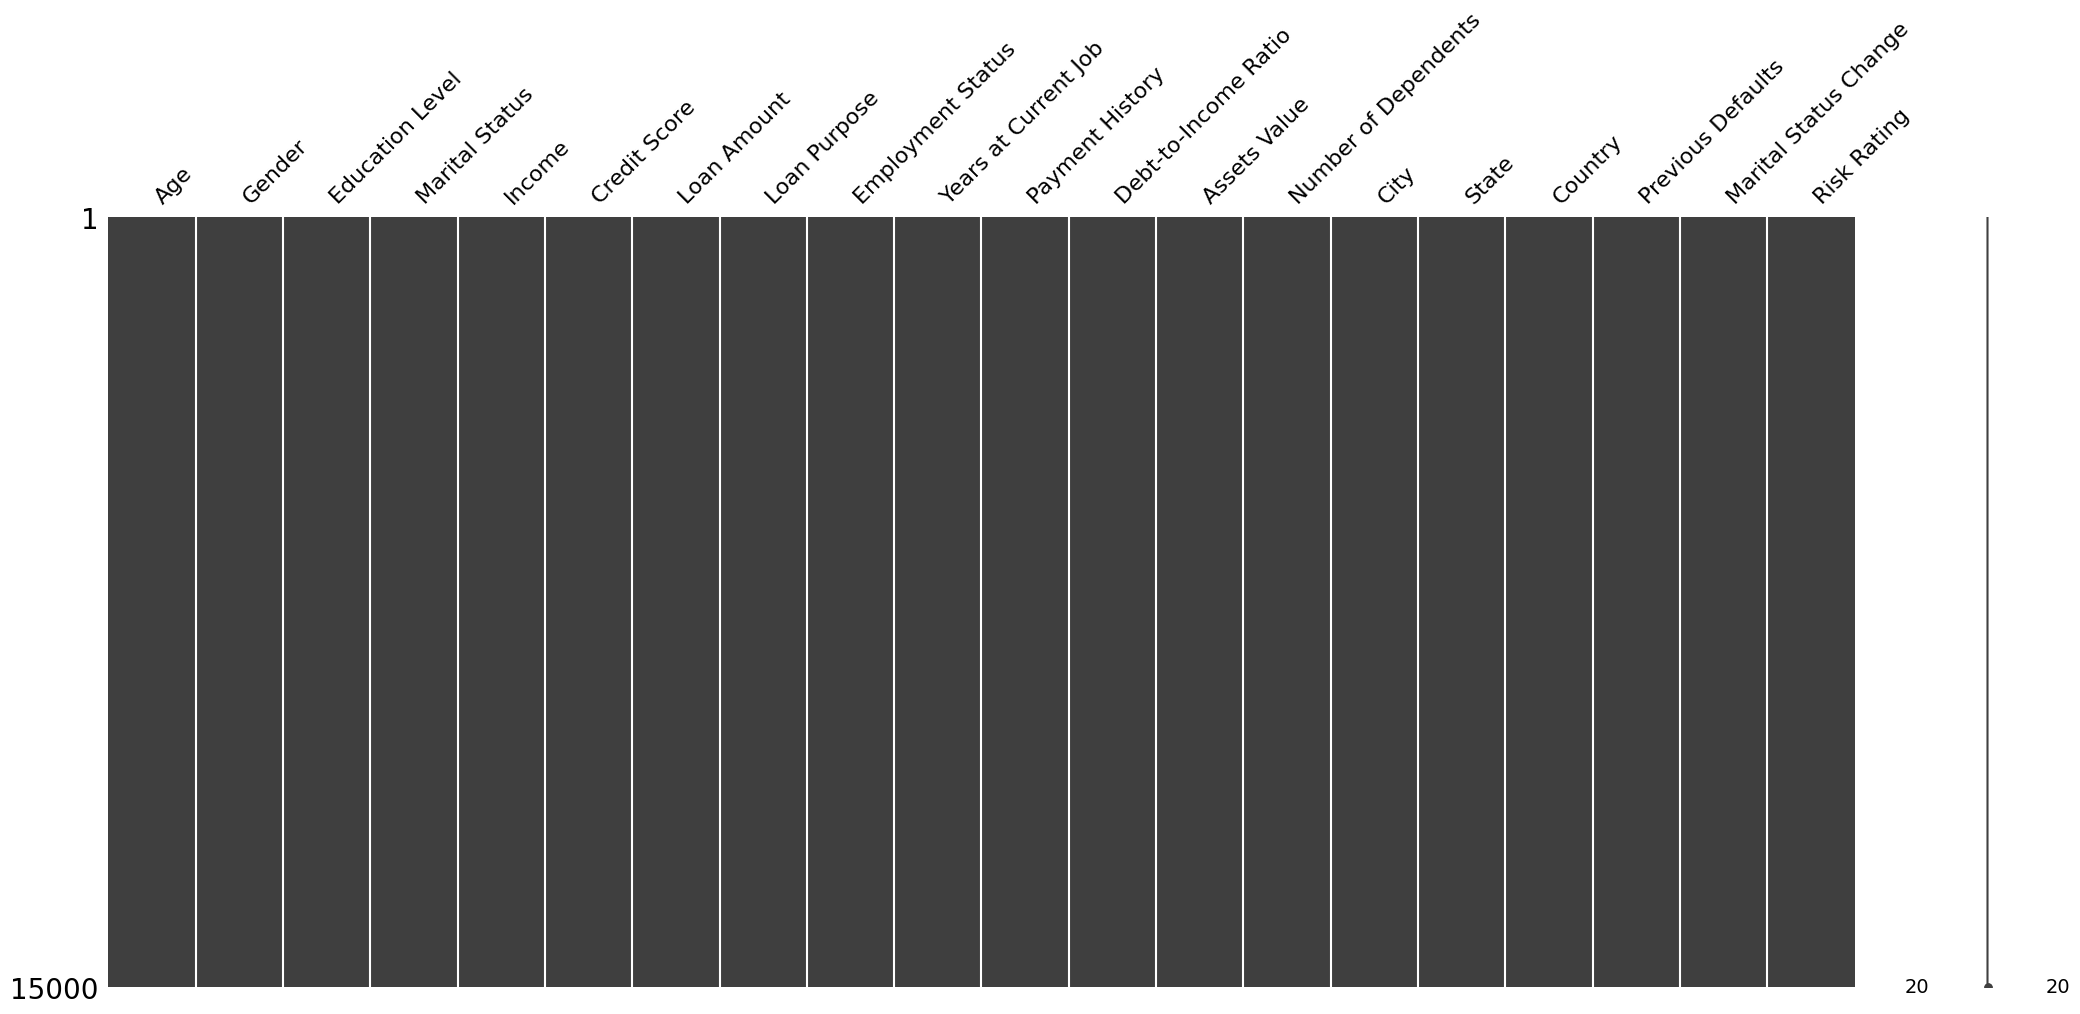

In [ ]:
msno.matrix(df)

In [ ]:
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,69773.0,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,2.0,New Heather,IL,Namibia,3.0,1,Low


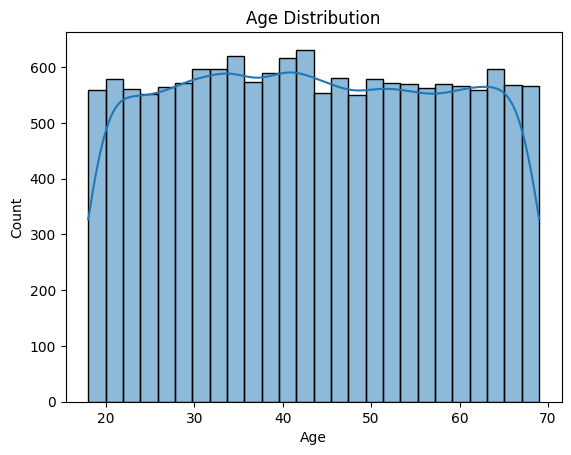

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

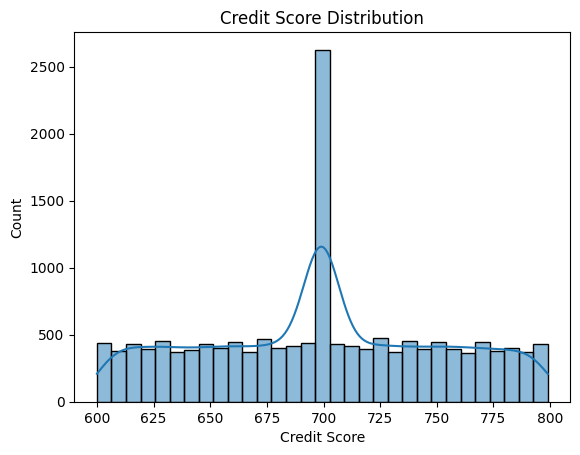

In [ ]:
sns.histplot(df['Credit Score'], kde=True)
plt.title('Credit Score Distribution')
plt.show()

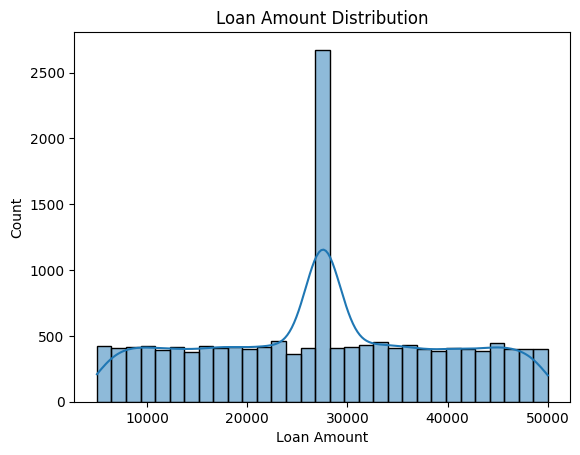

In [ ]:
sns.histplot(df['Loan Amount'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()

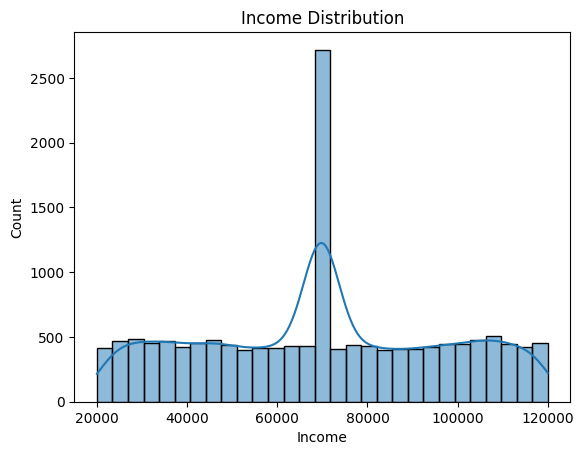

In [ ]:
sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution')
plt.show()

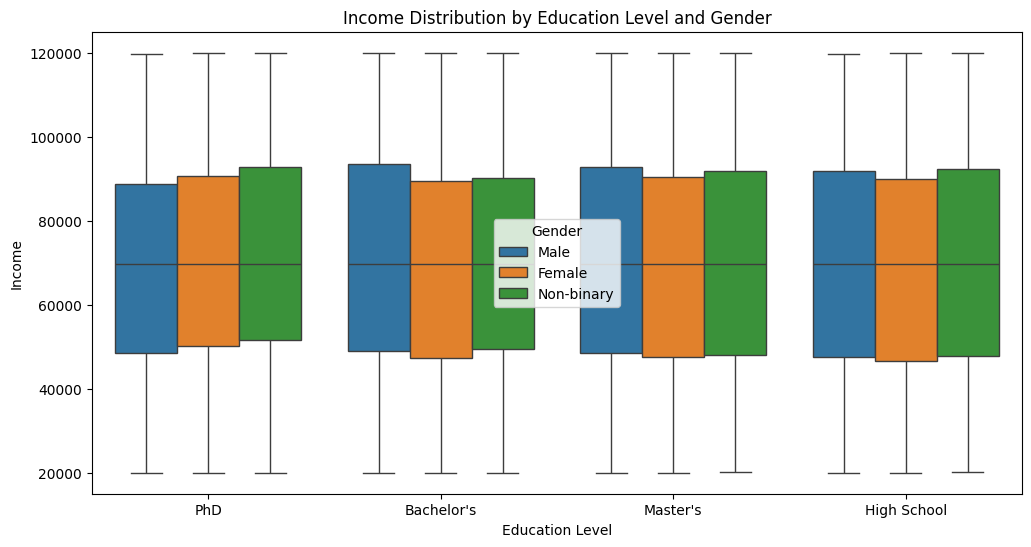

In [ ]:
# Box Plot, to visualize the distribution of income across different education levels, and how that distribution varies by gender.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education Level', y='Income', hue='Gender', data=df)
plt.title('Income Distribution by Education Level and Gender')
plt.xlabel('Education Level')
_ = plt.ylabel('Income')

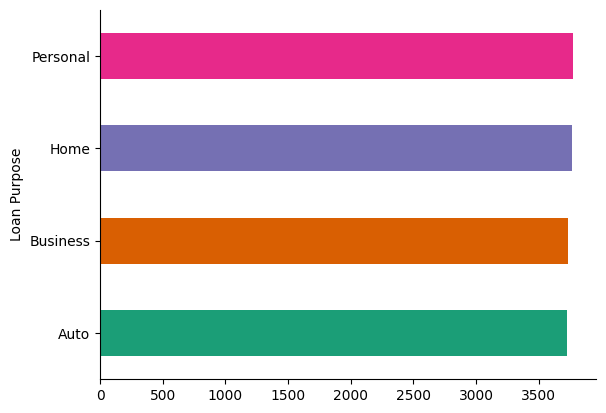

In [ ]:
# Horizontal Bar Plot, Displays the count of each unique value in Loan Purpose feature
df.groupby('Loan Purpose').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

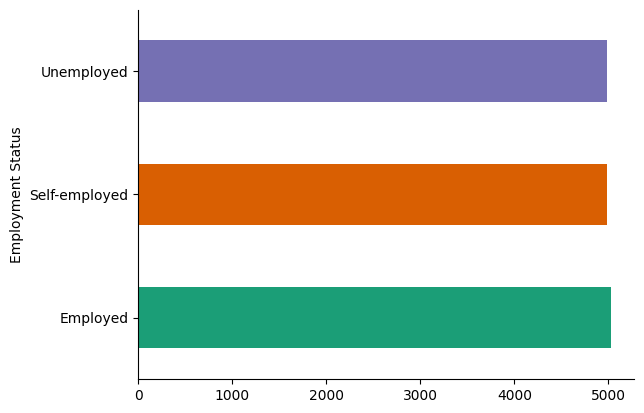

In [ ]:
# Horizontal Bar Plot, Displays the count of each unique value in Employement Status Feature
df.groupby('Employment Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

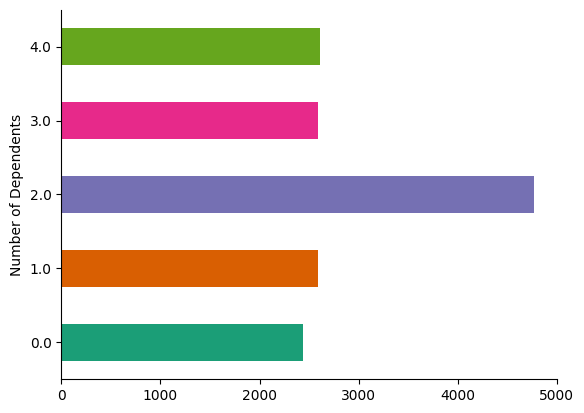

In [ ]:
# Horizontal Bar Plot, Displays the count of each unique value in No. Dependents
df.groupby('Number of Dependents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Gender', 'Marital Status', 'Loan Purpose', 'Education Level',
                       'Employment Status', 'Payment History', 'Risk Rating']

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,1,3,0,72799.0,688.0,45713.0,1,2,19,3,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,1
1,57,0,0,3,69773.0,690.0,33835.0,0,0,6,1,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,2
2,21,2,2,2,55687.0,600.0,36623.0,2,0,8,1,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,2
3,59,1,0,2,26508.0,622.0,26541.0,3,2,2,0,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,2
4,25,2,0,3,49427.0,766.0,36528.0,3,2,10,1,0.143242,287140.0,2.0,New Heather,IL,Namibia,3.0,1,1


In [ ]:
# List of numerical columns that might require scaling
numerical_columns = ['Age', 'Income', 'Credit Score', 'Loan Amount',
                     'Years at Current Job', 'Debt-to-Income Ratio',
                     'Assets Value', 'Number of Dependents', 'Previous Defaults']

scaler = StandardScaler()

# Applying scaling only to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,0.372049,1,3,0,0.107476,-0.210245,1.528532,1,2,1.650699,3,-1.362787,-0.532992,-1.554435,Port Elizabeth,AS,Cyprus,0.004899,2,1
1,0.908593,0,0,3,-0.005071,-0.172338,0.533628,0,0,-0.602523,1,-1.400265,-1.402645,-1.554435,North Catherine,OH,Turkmenistan,0.770434,2,2
2,-1.505856,2,2,2,-0.528976,-1.878147,0.767151,2,0,-0.255874,1,0.083105,0.283883,0.751240,South Scott,OK,Luxembourg,0.770434,2,2
3,1.042729,1,0,2,-1.614240,-1.461172,-0.077320,3,2,-1.295822,0,0.726309,-0.031955,0.751240,Robinhaven,PR,Uganda,1.535969,2,2
4,-1.237584,2,0,3,-0.761806,1.268122,0.759194,3,2,0.090776,1,-1.439714,1.721709,-0.017318,New Heather,IL,Namibia,0.770434,1,1


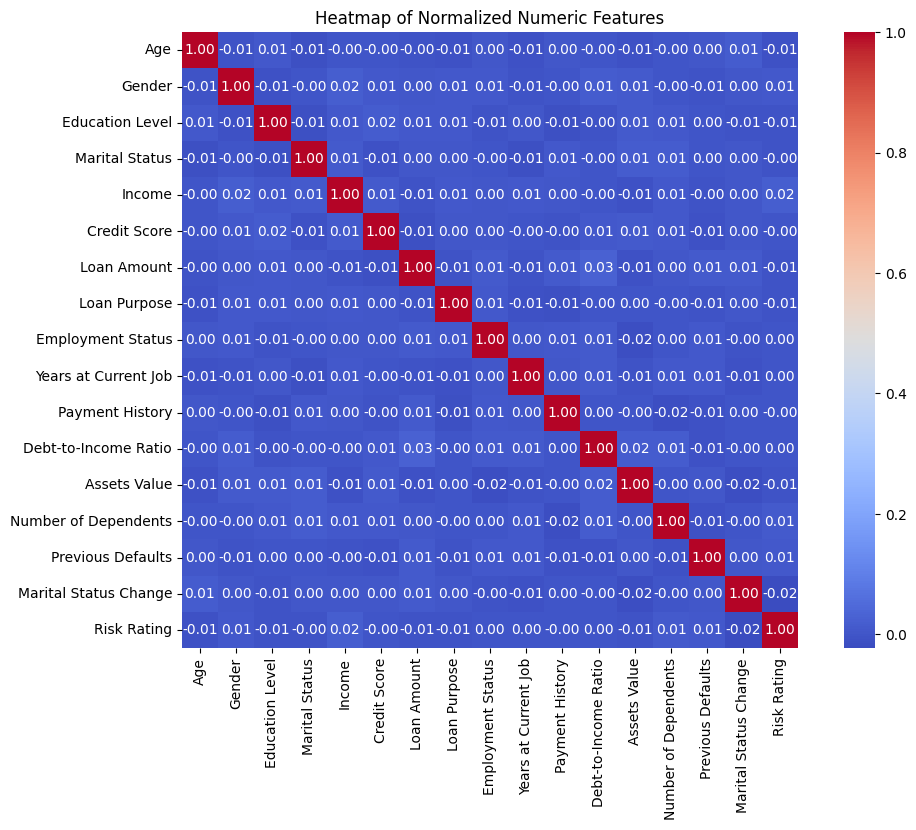

In [ ]:
# Creating df2 as a normalized dataset
df2 = df
numeric_cols = df2.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop(['City', 'State', 'Country'], errors='ignore')
plt.figure(figsize=(12, 8))
sns.heatmap(df2[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap of Normalized Numeric Features')
plt.show()

In [ ]:
df['Risk Rating'] = df['Risk Rating'].astype(int)
X = df.drop(['Risk Rating', 'City', 'State', 'Country'], axis=1, errors='ignore')
y = df['Risk Rating']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

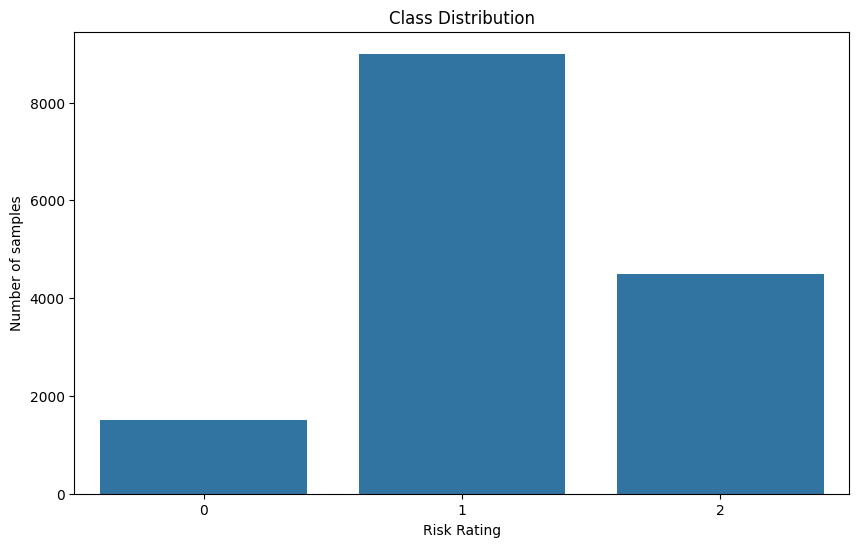

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Risk Rating')
plt.title('Class Distribution')
plt.xlabel('Risk Rating')
plt.ylabel('Number of samples')
plt.show()

In [ ]:
smote = SMOTE(random_state=42)

# Resampling the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train=X_train_resampled
y_train=y_train_resampled

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=9, min_samples_split=2, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(f"Decision Tree Accuracy: {100*accuracy_score(y_test, y_pred_dt):.2f}%")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 53.80%
              precision    recall  f1-score   support

           0       0.08      0.03      0.04       326
           1       0.59      0.85      0.70      1779
           2       0.27      0.10      0.14       895

    accuracy                           0.54      3000
   macro avg       0.31      0.33      0.30      3000
weighted avg       0.44      0.54      0.46      3000



In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=500, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {100*accuracy_score(y_test, y_pred_rf):.2f}%")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 56.60%
              precision    recall  f1-score   support

           0       0.14      0.02      0.04       326
           1       0.60      0.89      0.71      1779
           2       0.36      0.12      0.18       895

    accuracy                           0.57      3000
   macro avg       0.37      0.34      0.31      3000
weighted avg       0.48      0.57      0.48      3000



In [ ]:
# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=1550,max_depth=3,random_state=42,learning_rate=0.01)
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)
y_train_pred_xgb = xgb_model.predict(X_train)
# Accuracy
print(f"XGBoost Accuracy: {100*accuracy_score(y_test, y_pred_xgb):.2f}%")
print(classification_report(y_test,y_pred_xgb))


XGBoost Accuracy: 58.03%
              precision    recall  f1-score   support

           0       0.17      0.01      0.02       326
           1       0.59      0.95      0.73      1779
           2       0.36      0.06      0.10       895

    accuracy                           0.58      3000
   macro avg       0.38      0.34      0.28      3000
weighted avg       0.48      0.58      0.47      3000



In [ ]:
voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model), ('dt', dt_model)], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_voting);
print(f"Voting Classifier Accuracy:{100 * accuracy:.2f}%")
print(classification_report(y_test,y_pred_voting))

Voting Classifier Accuracy:56.63%
              precision    recall  f1-score   support

           0       0.07      0.01      0.02       326
           1       0.59      0.92      0.72      1779
           2       0.29      0.06      0.11       895

    accuracy                           0.57      3000
   macro avg       0.32      0.33      0.28      3000
weighted avg       0.45      0.57      0.46      3000



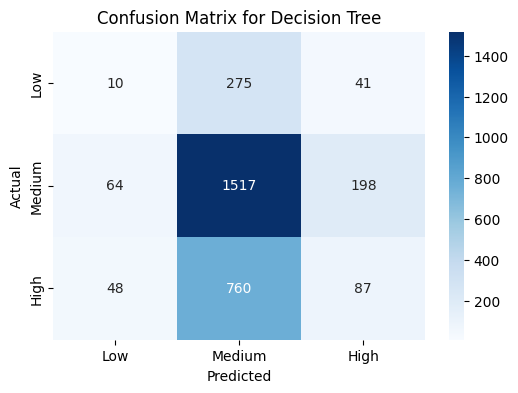

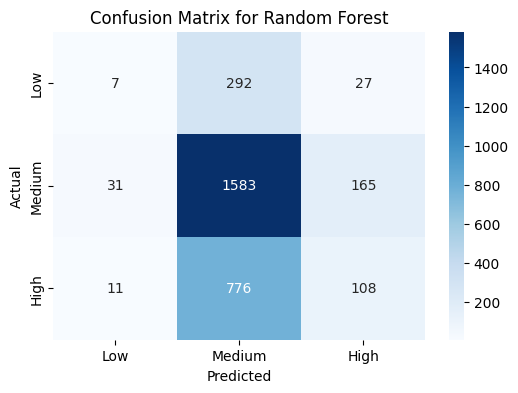

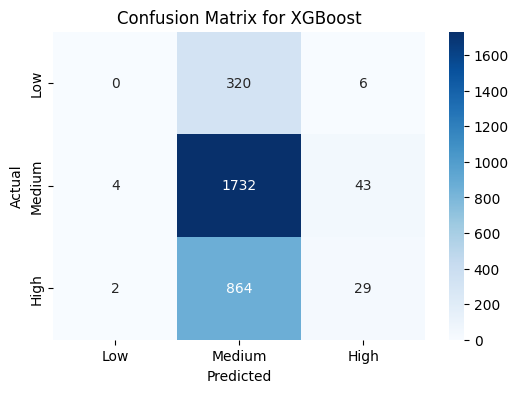

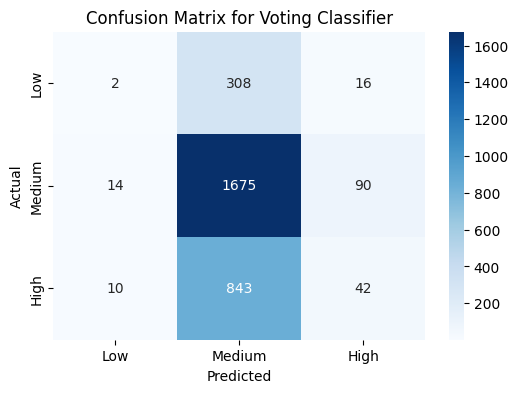

In [ ]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Decision Tree
y_pred_dt = dt_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

# Random Forest
y_pred_rf = rf_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# xg boost
y_pred_xgb = xgb_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

y_pred_voting = voting_clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred_voting, "Voting Classifier")

MLP Accuracy: 44.60%

Classification Report:

              precision    recall  f1-score   support

           0       0.11      0.13      0.12       326
           1       0.60      0.58      0.59      1779
           2       0.30      0.30      0.30       895

    accuracy                           0.45      3000
   macro avg       0.34      0.34      0.34      3000
weighted avg       0.46      0.45      0.45      3000



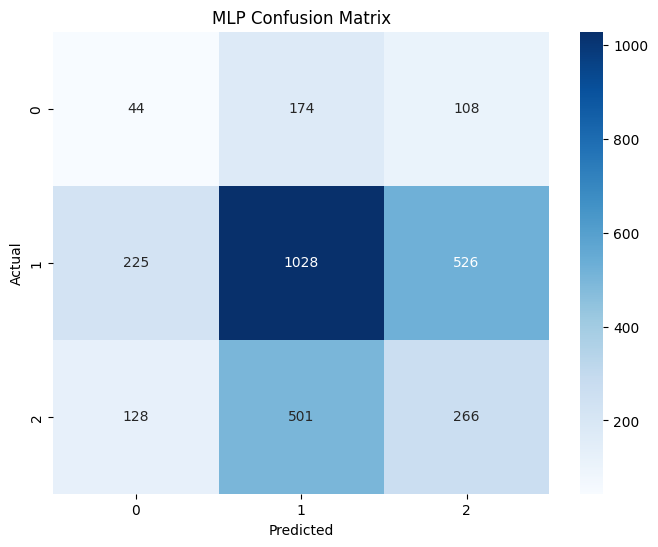

In [ ]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(150, 100, 50,),
    activation='tanh',
    solver='adam',
    alpha=0.01,
    learning_rate='adaptive',
    max_iter=1000,
    random_state=42
)

mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {100 * accuracy:.2f}%")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_mlp))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"{title} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred_mlp, "MLP")

Test Set Accuracy: 43.90%

Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.11      0.10       326
           1       0.59      0.59      0.59      1779
           2       0.29      0.26      0.28       895

    accuracy                           0.44      3000
   macro avg       0.32      0.32      0.32      3000
weighted avg       0.45      0.44      0.44      3000



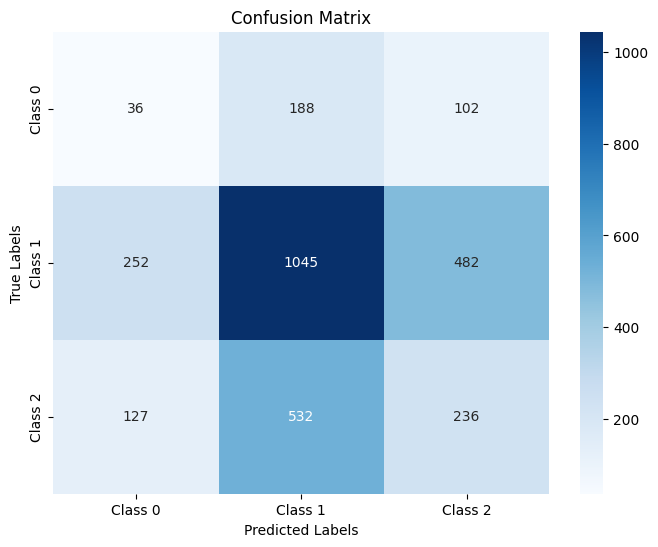

In [ ]:
# using rbf kernel
svm_model = SVC(kernel='rbf', C=1, gamma=0.1)
svm_model.fit(X_train, y_train)

y_pred_test = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Set Accuracy: {test_accuracy*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)

unique_classes = np.unique(y_test)
class_labels = [f"Class {cls}" for cls in unique_classes]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()